# Exam 1 due 5p Fri Nov 1 2024

Submit this file to Canvas as a PDF or HTML before Fri Nov 1, 2024 at 5:00pm to earn +2 bonus points. Extended deadline Sun Nov 3, 2024 at 11:59 pm for +0 bonus points. 

* You are **not** permitted to discuss this exam with anyone besides the TA and professor. 
* You are welcome to use analytical and numerical computational tools (including generative AI like LLM); if you do, include the **commented** sourcecode (or prompts) in your submission.
* You are welcome to consult websites, textbooks, and other materials; if you do, include a full citation in your writeup (e.g. the .pdf and/or .html file).

This exam is worth a total of 26 points. Each subproblem is worth 2 points. Exams will be graded on a 0-1-2 grading scale: 0 for no attempt; 1 for an incorrect attempt; 2 for a correct attempt (with partially-correct attempts possibly receiving between 1 and 2). 

# problem 0 - [preferred name (first last)]; [preferred pronouns]
a. Approximately how many hours did you spend on this exam?

# problem 1 - DC motor (4 points)

![problem1](exam1_figures/447_fa24_exam1_img1.png)

This is a schematic for a type of motor called a DC motor, which converts electrical voltage into mechanical rotation (i.e. velocity). In this system: 

* $u(t)$ -- input electrical voltage [Volt]
* $i(t)$ -- current [Amp]
* $R$ -- resistance [Ohm]
* $L$ -- inductance  [Henry]
* $\omega(t)$ -- angular velocity of the rotor [radians/sec]
* $\dot{\omega}(t)$ -- angular acceleration of the rotor [radians/sec$^2$]
* $J$ -- rotor inertia [kg$\cdot$m$^2$]
* $b$ -- friction constant [N$\cdot$m$\cdot$s]
* $K$ -- a motor-specific constant [N$\cdot$m/Amp]
* $v_{emf} = K \omega(t)$ -- back EMF (i.e. a voltage generated proportional to the angular velocity of the shaft, opposes input voltage) [Volt] 

The DC motor is an *electromechanical system*, and thus by modeling in both the electrical domain (Kirchoff's Voltage Law) and in the mechanical domain (Newton's 2nd Law), we can obtain the following equations of motion: 

$$ L \frac{di(t)}{dt} + R  i(t) + K \omega(t) = u(t)  $$ 
$$ J \dot{\omega}(t) + b  \omega(t) = K  i(t) $$

## subproblem 1a

Derive the transfer function for this system from input voltage $u$ to output velocity $\omega$, that is find $G_{\omega u} = \frac{W(s)}{U(s)}$. Your solution should be in terms of variable $s$ and constants $J, L, R, b,$ and $K$. 

### solution 1a

Taking the Laplace transform of both equations yields: 
$$ L s I(s) + R I(s) + K W(s) = U(s) \qquad (1) $$ 
$$ Js W(s) + b W(s) = K I(s) \qquad (2) $$

Solving Eq (2) for $I(s) = \frac{(Js + b)}{K} W(s)$ and plugging into Eq (1) yields: 
$$ \frac{(Js + b)(L s + R) + K^2}{K} W(s) = U(s)$$

So, the transfer function for the DC motor is: 
$$G_{\omega u} = \frac{W(s)}{U(s)} = \frac{K}{(Js + b)(L s + R) + K^2} = \frac{K}{JLs^2 + (JR + bL)s + (bR + K^2)}$$

## subproblem 1b

For a constant input voltage $u(t) = u_{e}$, what is the steady-state angular velocity $\omega_e$ for the DC motor? Recall that the steady-state angular velocity of the system is defined as $\omega(t)$ as $t \rightarrow \infty$. 
### solution 1b

If we think of constant input $u(t)=u_e$ in the form of a complex exponential $u(t) = u_e e^{0t}$, we know we can use the transfer function we derived in subproblem 1a to find the steady-state output $\omega(t)$ as $t \rightarrow \infty$: 

$$\omega_e = G_{\omega u} (0) u_e e^{0t} = \frac{K}{bR+K^2} u_e$$

**Note:** If you incorrectly solved for the transfer function in (1a) but correctly evaluated your transfer function at s=0 in (1b) and multiplied by $u_e$, you will earn full points for (1b). 

# problem 2 - linear state space (2 points)

![problem2](exam1_figures/447_fa24_exam1_img2.png)

Consider the mass-spring damper system in the diagram above. Two masses, $m_1$ and $m_2$, have positions denoted $y_1$ and $y_2$, respectively. Mass 1 is connected to a wall by a standard damper with damping coefficient $b$, which generates resistive force proportional to its velocity. Mass 1 is also being acted upon by an external force, denoted $f(t)$. Mass 1 and 2 are connected to each other through a spring with spring constant $k$, which generates resistive force proportional to its displacement. We can derive the equations of motion for this system as: 

$$ m_1\ddot{y}_1 + b\dot{y}_1 + k(y_1-y_2) = f(t) $$

$$ m_2\ddot{y}_2 + k(y_2-y_1) = 0$$

Write the equations of motion for this system in linear state space form using state vector $x = (y_1, \dot{y}_1, y_2, \dot{y}_2) \in \mathbb{R}^4$ and input $u = f(t) \in \mathbb{R}$.

### solution 2

Rearrange equations of motion to find expressions for $\ddot{y}_1, \ddot{y}_2$:
$$ \ddot{y_1} = \frac{1}{m_1}(-k y_1 + k y_2 - b\dot{y}_1 + f(t)) $$
$$ \ddot{y_2} = \frac{1}{m_2}(-k y_2 + k y_1) $$

Now writing these in form $\dot{x} = Ax + Bu$: 
$$ \begin{bmatrix} 
\dot{y}_1 \\
\ddot{y}_1 \\
\dot{y}_2 \\
\ddot{y}_2 
\end{bmatrix} =
\begin{bmatrix} 
0 & 1 & 0 & 0 \\
-k/m_1 & -b/m_1 & k/m_1 & 0 \\ 
0 & 0 & 0 & 1 \\
k/m_2 & 0 & -k/m_2 & 0
\end{bmatrix}
\begin{bmatrix} 
y_1 \\
\dot{y}_1 \\
y_2 \\
\dot{y}_2 
\end{bmatrix} +
\begin{bmatrix} 
0 \\
1/m_1 \\
0 \\
0
\end{bmatrix}
f(t) $$


# problem 3 - stability criteria (4 points)
## subproblem 3a 
Consider the following state-space system: 
$$ \dot{x} = Ax + Bu = \begin{bmatrix} -2 & -1 & -3 \\ 0 & -1 & 2 \\ -7 & -8 & -9  \end{bmatrix} 
x + 
\begin{bmatrix} 
2 \\ 1 \\ 2 
\end{bmatrix} u$$
You (correctly) calculate the eigenvalues of the A matrix as $-9.68,  -1.1 + 0.5 i$,  and $-1.1 - 0.5 i$. Is this system stable or unstable? How do you know?

### solution 3a 
This system is stable becuase all the eigenvalues have negative real parts. 

## subproblem 3b
For the following system, use the Routh-Hurwitz criteria to determine the range of the parameter $K$ that results in stability. Show your work.

$$ G(s) = \cfrac{K}{2s^3 + 20s^2 + 50s + K} $$

### solution 3b
Using Routh-Hurwitz critera, for a third order characteristic polynomial ($s^3 + a_1 s^2 + a_2 s + a_3$), if $a_1, a_2, a_3 > 0$ and $a_1 \cdot a_2 > a_3$, then the system is stable. 

Normalize to apply R-H critera: $ s^3 + 10s^2 + 25s + \frac{1}{2}K$ \
For this characteristic polynomial, $a_1 = 10$, $a_2 = 25$, $a_3 = \frac{1}{2}K$. Therefore the Routh-Hurwitz critera become: $K > 0$ and $10 \cdot 25 > \frac{1}{2}K$. \
So, for the closed-loop system to be stable, $0 < K < 500$. 

# problem 4 - equilibria, phase portraits, and stability (6 points)


## subproblem 4a
Find the equilibria (show your process) for the following nonlinear system. Report your answer in $(x_1, x_2)$ coordinate pairs. 

$\dot{x}_1 = x_2$

$\dot{x}_2 = -x_1 + \cfrac{1}{6}x_1^3 - x_2$

### solution 4a
Setting $(\dot{x}_1, \dot{x}_2) = (0,0)$, we obtain $x_2 = 0$ and plug into the second equation to obtain $x_1(\frac{1}{6}x_1^3 -1) = 0$ and thus $x_1 = 0, \sqrt{6}, -\sqrt{6}$

The equilibria for this system are: $(0,0), (\sqrt{6},0), (-\sqrt{6},0)$

**Note:** To earn full credit for this problem, you must demonstrate that you set $(\dot{x}_1, \dot{x}_2) = (0,0)$. 

## subproblem 4b
Generate a phase portrait for the nonlinear system in (4a). You should use the code we have used in class and in HW2. Be sure to use ranges for $x_1$ and $x_2$ such that the all equilibria are visible. 

**Hint:** Your phase portraits should confirm the locations of your calculated equilibria!

### solution 4b

In [5]:
# First, import numerical_simulation function from class
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt

# build ODE solver
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u)

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]

  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

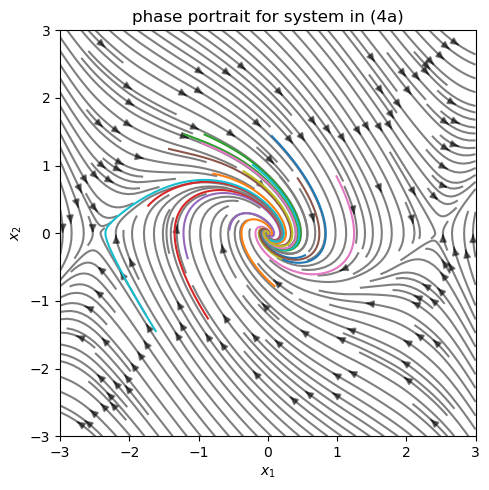

In [9]:
# Next, generate solution for subproblem 2 using numerical_simulation function above. 
dt = 1e-2

ut = lambda x : 0

# system from subproblem 2a
def f1(t,x,u):
    x1,x2 = x
    dx = np.array([x2, -x1 + (1/6)*(x1**3) - x2])
    return dx

plt.figure(figsize=(5,5))

# simulation time
t = 10

# phase portrait / "quiver" plot for system in subproblem 4a
ax = plt.subplot(1,1,1)
X, Y = np.meshgrid(np.linspace(-3,+3, 11), np.linspace(-3, +3, 11))
dX,dY = np.asarray([f1(0.,(x,y),0.).flatten() for x,y in zip(X.flatten(),Y.flatten())]).T
dX,dY = dX.reshape(X.shape),dY.reshape(Y.shape)
ax.streamplot(X,Y,dX,dY,density=2.,color=(0,0,0,.5))
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

for _ in range(20):
  x0 = 3*np.random.rand(2) + [-2,-1.5]
  t_,x_ = numerical_simulation(f1,t,x0,dt=dt,ut=ut)
  ax.plot(x_[:,0],x_[:,1])

ax.set_xlim((-3,+3))
ax.set_ylim((-3,+3))
plt.title('phase portrait for system in (4a)')

plt.tight_layout()

## subproblem 4c 

Look at the two phase portraits below. For each phase portrait: \
&emsp; i. state the location of the equilibria in $(x_1,x_2)$ coordinates \
&emsp; ii. state if that equilibrium point is stable or unstable.

**Notes:** 
* You can do this by inspection, there is no need to prove anything mathematically
* The equilibria in these figures are all at integer coordinates
* There are a total of four equilibria pictured
* To earn full credit for this subproblem you should comment on the stability of **all** the equilibria in **both** phase portraits

![problem4](exam1_figures/447_fa24_exam1_img4.png)

### solution 4c
For subproblem 4c (1): 
* $(0,0)$ is unstable (all trajectories diverge away)
* $(-2,1)$ and $(2,1)$ are stable (all trajectories converge towards)

For subproblem 4c (2): 
* $(0,-1)$ is unstable (all trajectories diverge away). 



# problem 5 - PI controller design for RC circuit (6 points)

![problem5](exam1_figures/447_fa24_exam1_img5.png)

Consider the RC circuit, where $R$ is the resistance, $C$ is the capacitance, $u$ is the input voltage, and $v$ is the voltage over the capacitor. Suppose we want to design a proportional-integral (PI) controller for **reference tracking**, that is, we want to be able to command a voltage signal $r$ for the circuit to produce over the capacitor.  

The closed-loop transfer function from output to input for this feedback system is: 
$$ G_{vr} = \frac{PC}{1+PC} = \frac{k_p s + k_i}{RCs^2 + (k_p + 1) s + k_i} $$

## subproblem 5a
Write down the differential equation (DE) that corresponds to this closed-loop system.

### solution 5a
We know the transfer function is the expression $\cfrac{b(s)}{a(s)}$ where $b(s)$ is the polynomial of coefficients from the input side of the DE, and $a(s)$ is the polynomial of coefficients from the output side of the DE. Therefore, the DE for the closed-loop system is given by: 

$$ RC \ddot{v} + (k_p + 1) \dot{v} + k_i v = k_p \dot{r} + k_i r$$

## subproblem 5b
Write down the linear state space equation for this closed-loop system in the form $\dot{x} = Ax + Bu$. 

### solution 5b
We can write the state space equations for this system by rearranging our differential equation in (3b) and writing down the corresponding matrices.
Defining $x = (v, \dot{v})$ and $u = (r, \dot{r})$, we obtain: 

$$ 
\begin{bmatrix}
\dot{v} \\ \ddot{v}
\end{bmatrix} = 
\begin{bmatrix}
0 & 1 \\ 
\cfrac{-k_i}{RC} & \cfrac{-(k_p + 1)}{RC}
\end{bmatrix}
\begin{bmatrix}
v \\ \dot{v}
\end{bmatrix} + 
\begin{bmatrix}
0 & 0 \\ \cfrac{k_i}{RC} & \cfrac{k_p}{RC}
\end{bmatrix}
\begin{bmatrix}
r \\ \dot{r}
\end{bmatrix}
$$

## subproblem 5c 
Using computational methods we practiced in class examples and homework, write a program to simulate this closed-loop system's homogenous response to a step input (i.e. $r(t) = 1$ for $t > 0$). Use initial conditions $(v, \dot{v}) = (0, 0)$ and run the simulation for 10 seconds.  

Use the following system parameters for this problem: $R = 1$, $C = 1$

Run your simulation twice using the following combinations of $k_p$ and $k_i$: 
* $k_{p1} = 1, k_{i1} = 1$
* $k_{p2} = 2, k_{i2} = 10$

Generate one plot that shows:
* $r(t)$ vs $t$
* $v_1(t)$ vs. $t$ (using $k_{p1}, k_{i1}$)
* $v_2(t)$ vs. $t$ (using $k_{p2}, k_{i2}$)

Be sure to use informative axis and legend labels to earn full credit for this problem. Your output $v(t)$ should converge to 1 within the 10 second simulation window. 

### solution 5c

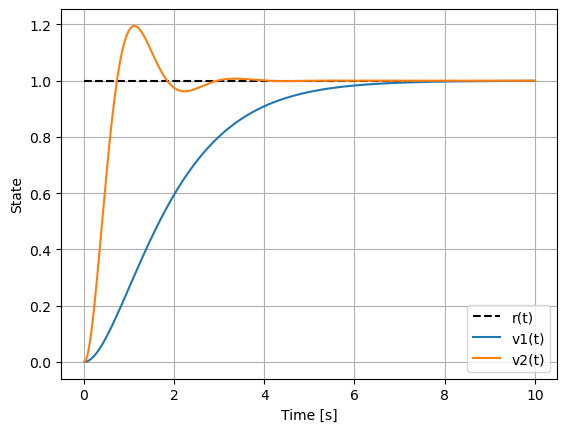

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
R = 1.0
C = 1.0

# Time parameters
dt = 0.01  # Time step
T = 10     # Total simulation time
N = int(T/dt)
t = np.linspace(0, T, N)

# A matrix
def A(k_p,k_i):
    A = np.array([[0, 1],
                  [-k_i/(R*C), -(k_p+1)/(R*C)]])
    return A


# B matrix
def B(k_p,k_i):
    B = np.array([[0, 0],
                    [k_i/(R*C), k_p/(R*C)]])
    return B


# Reference arrays step input
r = np.ones(N)
r_dot = np.gradient(r, dt) # Derivative of reference

def simulate_DE(r, r_dot, A_mat, B_mat, dt, v0, v0_dot):
    # Initialize state and reference input arrays
    v = np.zeros(N)          
    v_dot = np.zeros(N)    
    # Initial conditions

    v[0] = v0    # Initial displacement
    v_dot[0] = v0_dot  # Initial velocity

    # Euler's method
    for i in range(1, N):
        # State vector
        z_vec = np.array([v[i-1], v_dot[i-1]])
    
        # Reference vector
        r_vec = np.array([r[i], r_dot[i]])
    
        # Compute derivative of state vector
        dz_dt = A_mat @ z_vec + B_mat @ r_vec
    
        # Update state using Euler's method
        z_next = z_vec + dz_dt * dt
    
        # Store the results
        v[i] = z_next[0]
        v_dot[i] = z_next[1]
    
    return v, v_dot

k_p1 = 1
k_i1 = 1
v1, _ = simulate_DE(r, r_dot, A(k_p1, k_i1), B(k_p1, k_i1), dt,0,0)
# eigenvalue, _ = np.linalg.eig(A(k_p1, k_i1))
# print(eigenvalue)

k_p2 = 2
k_i2 = 10
v2, _ = simulate_DE(r, r_dot, A(k_p2, k_i2), B(k_p2, k_i2), dt,0,0)
# eigenvalue, _ = np.linalg.eig(A(k_p2, k_i2))
# print(eigenvalue)

# Plot the results
plt.figure()
plt.plot(t, r,'k--',label='r(t)')
plt.plot(t, v1, label='v1(t)')
plt.plot(t, v2, label='v2(t)')
plt.xlabel('Time [s]')
plt.ylabel('State')
plt.legend()
plt.grid()
plt.show()

# problem 6 - linearization (2 points)

![problem6](exam1_figures/447_fa24_exam1_img6.png)

Consider the mass-spring damper system in the diagram above. In this system, the position of mass $M$ is denoted by $y$. An external force $F$ acts on mass $M$. The mass is connected to a wall by two **nonlinear** elements: 
* a nonlinear damper that generates force proportional to the magnitude of the ***velocity cubed*** $\Rightarrow F_d = C \dot{y}^3$, where $C$ is a constant. 
* a nonlinear spring that generates force proportional to the magnitude of the ***displacement cubed*** $\Rightarrow F_s = K y^3$, where K is a constant. 

It might seem complicated, but the equation of motion for this system can be written as: 

$$ M\ddot{y} = F - Ky^3 - C\dot{y}^3 $$

With a state vector $x = (y, \dot{y}) \in \mathbb{R}^2$ and input vector $u= F \in \mathbb{R}$, we can write this system in nonlinear state space form as:
$$f(x,u) = 
\begin{bmatrix}
\dot{y} \\ \ddot{y}
\end{bmatrix} =
\begin{bmatrix}
\dot{y} \\ \frac{1}{M}(F - Ky^3 - C\dot{y}^3)
\end{bmatrix} 
$$

Linearize this system about the equilibrium point: 
* $x_e = (y_e, \dot{y}_e) = (1, 0)$
* $u_e = 10$

Write your final linearized system in the form $\delta \dot{x} = A \delta x + B \delta u$. Make sure you write a vector or matrix expression for $A$, $B$, $\delta x$, and $\delta u$ each term to earn full credit. 

**Hint:** Recall that in this form, the A and B matrices are the *Jacobian* matrices.

### solution 6
First, define $\delta x$ and evaluate at $x_e = (1,0)$ and define $\delta u$ and evaluate at $u_e = 10$: 
$$ \delta x = \begin{bmatrix}
y-y_e \\ \dot{y} - \dot{y}_e
\end{bmatrix} = 
\begin{bmatrix}
y-1 \\ \dot{y}
\end{bmatrix},
\qquad 
\delta u = F-u_e = F - 10
$$

Next, write the Jacobian matrices and evaluate at $x_e = (1,0)$, $u_e = 10$: 

$$ A = 
\begin{bmatrix}
\frac{\partial}{\partial y} \dot{y} & 
\frac{\partial}{\partial \dot{y}} \dot{y} \\
\frac{\partial}{\partial y} \ddot{y} & 
\frac{\partial}{\partial \dot{y}} \ddot{y} \\
\end{bmatrix} = 
\begin{bmatrix}
0 & 1 \\ 
-\frac{3K}{M}y_e^2 & -\frac{3C}{M}\dot{y}_e^2\\ 
\end{bmatrix} = 
\begin{bmatrix}
0 & 1 \\ 
-\frac{2K}{M} & 0\\ 
\end{bmatrix}
$$

$$ B = 
\begin{bmatrix}
\frac{\partial}{\partial u} \dot{y} \\
\frac{\partial}{\partial u} \ddot{y} \\
\end{bmatrix} = 
\begin{bmatrix}
0 \\ \frac{1}{M}
\end{bmatrix}
$$

The full linearized state space equation is given by: 
$$
\delta\dot{x} = 
\begin{bmatrix}
0 & 1 \\ 
-\frac{3K}{M} & 0\\ 
\end{bmatrix}
\begin{bmatrix}
y-1 \\ \dot{y}
\end{bmatrix} + 
\begin{bmatrix}
0 \\ \frac{1}{M}
\end{bmatrix} \left( F-10 \right)
$$

# problem 7 - block diagram algebra (2 points)

![problem7](exam1_figures/447_fa24_exam1_img7.png)

Using the block diagram above, write down the expression for the closed-loop transfer function from $y$ to $r$ ($G_{yr}$) in terms of blocks $C$, $P$, and $H$. 

### solution 7

![problem7](exam1_figures/447_fa24_exam1_img7_SOLUTION.png)

With principles of block diagram algebra, we can write: $Y = P \left( C(R-Y) - HY \right)$

Isolating Y on one side and dividing by $R$ yields: $G_{yr} = \cfrac{Y}{R} = \cfrac{PC}{1 + PC + PH}$